# Google Stock Data ANalyis and Prediction

In [1]:
# import dependencies
import pandas as pd

In [32]:
# file path
file_path = 'googl_data_2020_2025.csv'
# skipping first 2 rows, as they contain metadata
df = pd.read_csv(file_path, skiprows=2) 

In [33]:
df.columns = ['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']

In [34]:
#convert Date to datetime format using pandas
df['Date'] = pd.to_datetime(df['Date'])

In [35]:
#setting index to Date
df.set_index('Date', inplace=True)

In [36]:
df.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2020-01-02 00:00:00+00:00,68.186821,68.433998,68.433998,67.324501,67.420502,27278000
2020-01-03 00:00:00+00:00,67.830101,68.075996,68.687500,67.365997,67.400002,23408000
2020-01-06 00:00:00+00:00,69.638054,69.890503,69.916000,67.550003,67.581497,46768000
2020-01-07 00:00:00+00:00,69.503548,69.755501,70.175003,69.578003,70.023003,34330000
2020-01-08 00:00:00+00:00,69.998253,70.251999,70.592499,69.631500,69.740997,35314000


In [37]:
#check missing values
df.isnull().sum()

Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

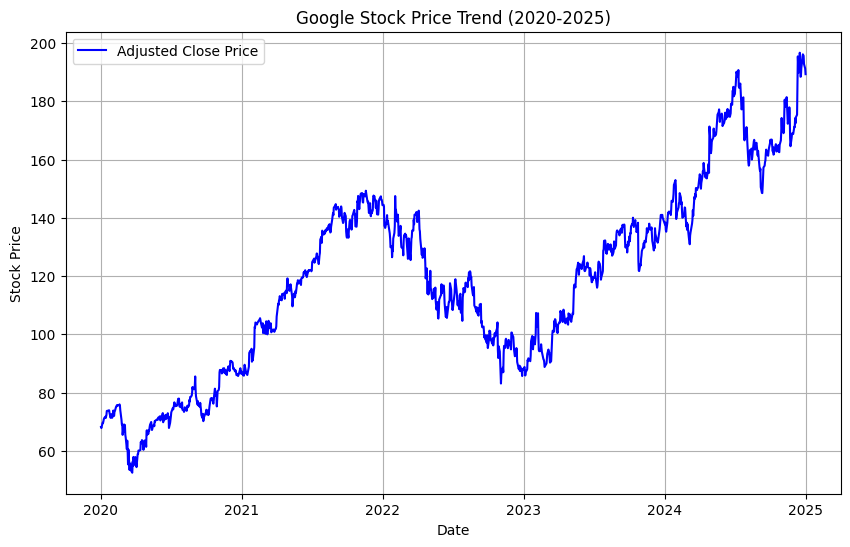

In [38]:
# time series line plot (Stock Price over time)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df.index, df["Adj Close"], label="Adjusted Close Price", color="Blue")
plt.xlabel('Date')
plt.ylabel("Stock Price")
plt.title("Google Stock Price Trend (2020-2025)")
plt.legend()
plt.grid(True)
plt.show()

In [39]:
#candle stick chart using plotly
import plotly.graph_objects as go

fig = go.Figure(
    data=[
        go.Candlestick(
            x=df.index,
            open=df['Open'],
            high=df['High'],
            low=df["Low"],
            close=df['Close']
        )
    ]
)

fig.update_layout(title="Google STock Price Candle Stick Chart", xaxis_title="Date", yaxis_title="Price")
fig.show()

In [46]:
# moving averages from average value per time for smooth fluctuations
df['50-day-SMA'] = df['Adj Close'].rolling(50).mean() # simple moving average 
df['200-day-SMA'] = df['Adj Close'].rolling(200).mean() # long term SMA


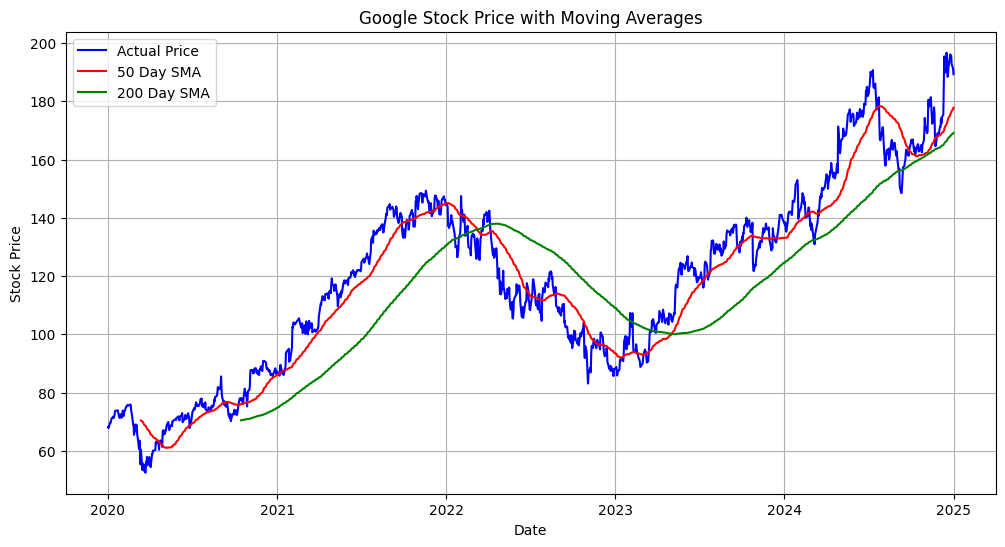

In [47]:
#plot moving averages
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Adj Close'], color="blue", label="Actual Price")
plt.plot(df.index, df['50-day-SMA'], color="red", label="50 Day SMA")
plt.plot(df.index, df['200-day-SMA'], color="green", label="200 Day SMA")


plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Google Stock Price with Moving Averages")
plt.legend()
plt.grid()
plt.show()


In [66]:
#create lag features (Previous days prices as input)
df["Prev_day_1"] = df['Adj Close'].shift(1)
df["Prev_day_2"] = df['Adj Close'].shift(2)
df["Prev_day_3"] = df['Adj Close'].shift(3)
df["Prev_day_4"] = df['Adj Close'].shift(4)
df["Prev_day_5"] = df['Adj Close'].shift(5)

df["Prev_day_6"] = df['Adj Close'].shift(6)
df["Prev_day_7"] = df['Adj Close'].shift(7)



In [67]:
df.dropna(inplace=True) # drop missing values in case some of them missed during shift

In [76]:
df.tail()

,Adj Close,Close,High,Low,Open,Volume,50-day SMA,200-day-SMA,50-day-SMA,Prev_day_1,Prev_day_2,Prev_day_3,Prev_day_4,Prev_day_5,Prev_day_6,Prev_day_7
Date,,,,,,,,,,,,,,,,
2024-12-24 00:00:00+00:00,196.110001,196.110001,196.110001,193.779999,194.839996,10403300,175.528695,168.082616,175.528695,194.630005,191.410004,188.509995,188.399994,195.419998,196.660004,189.820007
2024-12-26 00:00:00+00:00,195.600006,195.600006,196.750000,194.380005,195.149994,12046600,176.135283,168.370617,176.135283,196.110001,194.630005,191.410004,188.509995,188.399994,195.419998,196.660004
2024-12-27 00:00:00+00:00,192.759995,192.759995,195.320007,190.649994,194.949997,18891400,176.691064,168.637992,176.691064,195.600006,196.110001,194.630005,191.410004,188.509995,188.399994,195.419998
2024-12-30 00:00:00+00:00,191.240005,191.240005,192.550003,189.119995,189.800003,14264700,177.260995,168.881276,177.260995,192.759995,195.600006,196.110001,194.630005,191.410004,188.509995,188.399994
2024-12-31 00:00:00+00:00,189.300003,189.300003,191.960007,188.509995,191.080002,17466900,177.782337,169.124426,177.782337,191.240005,192.759995,195.600006,196.110001,194.630005,191.410004,188.509995


In [81]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


# split train and test data
X = df[["Prev_day_1","Prev_day_2", 'Prev_day_3' ]]
y = df['Adj Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

mean_absolute_error(y_test, y_pred_dt)


2.7088309872985787

In [71]:
r2_score(y_test, y_pred_dt)

0.984057410256505

In [83]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print(mean_absolute_error(y_test, y_pred_rf))
print(r2_score(y_test, y_pred_rf))

1.9199513078781945
0.9905422156972334


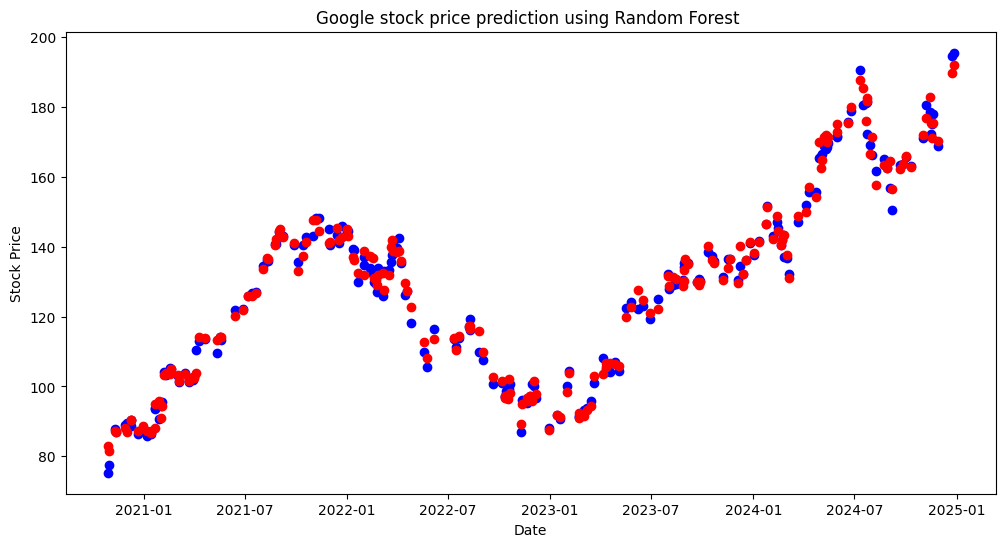

In [74]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test.index, y_test, label="Actual Price", color="blue")
plt.scatter(y_test.index, y_pred_rf, label="Predicted Prices Random Forest", color="red")

plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Google stock price prediction using Random Forest ")
plt.show()


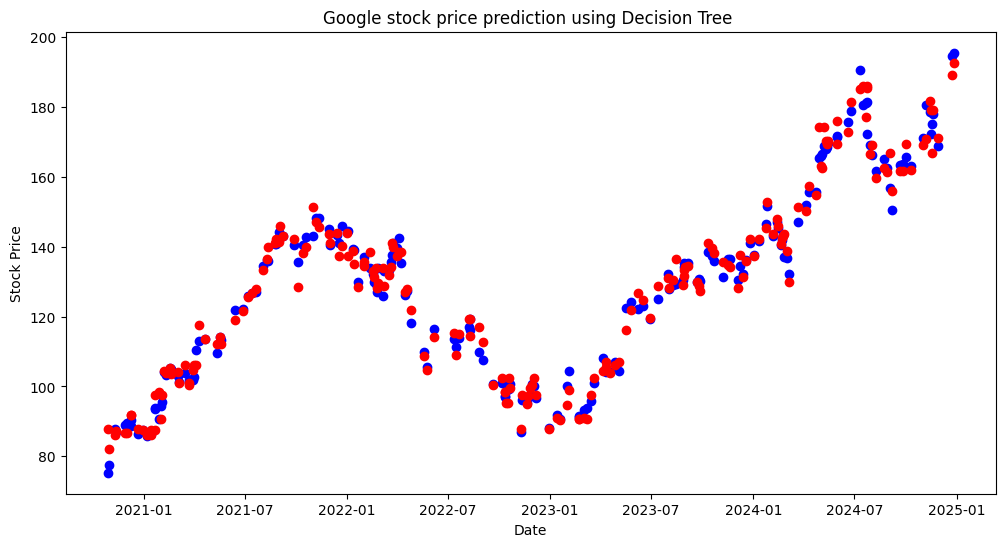

In [75]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test.index, y_test, label="Actual Price", color="blue")
plt.scatter(y_test.index, y_pred_dt, label="Predicted Prices Decison Tree", color="red")

plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Google stock price prediction using Decision Tree ")
plt.show()


In [84]:
import numpy as np

#get last available row(most recent stock price)
latest_data = df.iloc[-1][['Prev_day_1', 'Prev_day_2', 'Prev_day_3']].values.reshape(1, -1)


In [85]:
tomorrow_price = rf_model.predict(latest_data)

c:\Users\LENOVO\Desktop\python-ai-class\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



In [88]:
f"""Google Stock Price for Tomorrow.
    In this data 2024/12/31 was last day). 
    SO we are predicting 2025/1/1 price
     {tomorrow_price[0]:.2f}
    
    """

'Google Stock Price for Tomorrow.\n    In this data 2024/12/31 was last day). \n    SO we are predicting 2025/1/1 price\n     190.38\n    \n    '